Read 5 years of prices
Shape of Prices data (5, 12)

Average gas price for each month

Jan : 1.3954
Feb : 1.4591999999999998
Mar : 1.5486
Apr : 1.5938
May : 1.6398
Jun : 1.6431999999999998
Jul : 1.59
Aug : 1.5772
Sep : 1.6308
Oct : 1.1945999999999999
Nov : 1.1602000000000001
Dec : 1.1016

Average gas price for each year

2000 : 1.51
2001 : 1.4610000000000003
2002 : 1.3575
2003 : 1.5907499999999999


C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 'U' mode is deprecated


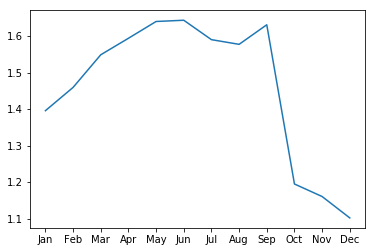

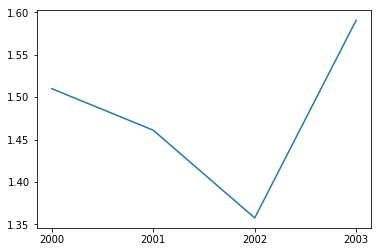

In [12]:
import os
import csv
import numpy as np
path = os.getcwd()
infile = os.listdir(path)[-5]

# create new empty lists:  years and prices come from data
yearsList = []
pricesList = []
# names of months for labeling results
monthList = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
    'Nov', 'Dec'
]

# read the data
with open(infile, 'rU') as csvfile:
    # the csv file reader returns a list of the csv items on each line - note delimiter is comma
    priceReader = csv.reader(csvfile, dialect='excel', delimiter=',')

    # from each line, a list of row items, make separate lists for years and for the prices
    for line in priceReader:
        # skip lines without data
        if line[0] == '' or line[0].startswith('Price') or line[0].startswith(
                'Year'):
            continue
        else:
            try:
                # add the year to list
                if int(line[0])>= 2000:
                    yearsList.append(line[0])
                # append the prices (as strings) to the list
                    pricesList.append(line[1:])
            except IndexError:
                print('Error: ', line)
csvfile.close()

print("Read", len(yearsList), "years of prices")

# make a numpy array for the strings
data = np.array(pricesList)
print('Shape of Prices data', data.shape)

# convert the empty strings to strings of zeros, using a Boolean mask to find empty strings
data[data == ''] = '0'

# now we can convert the whole thing to float without getting conversion errors for the empty strings
prices = data.astype(np.float)

#print(prices)

# compute the average price for each month (or use mean)
# sum along the columns
monthTotalPrices = np.sum(prices, axis=0)
# divide by number of years to get average
monthAveragePrices = monthTotalPrices / len(yearsList)

#print(monthAveragePrices)
print("\nAverage gas price for each month\n")

# print the average price for each month
for i, mon in enumerate(monthList):
    print(mon, ':', monthAveragePrices[i])

# compute the average price for each year up to the last one with missing data
# sum along the rows
yearTotalPrices = np.sum(prices, axis=1)
# divide by number of months to get average
yearAveragePrices = yearTotalPrices / 12

#print(monthAveragePrices)
print("\nAverage gas price for each year\n")

# print the average prices for the years
for i, year in enumerate(yearsList[:-1]):
    print(year, ':', yearAveragePrices[i])

# or display the monthly averages as a simple plot

import matplotlib.pyplot as pp

x = np.arange(12)
pp.xticks(x, monthList)
pp.plot(x, monthAveragePrices)
pp.show()

# or we can also display the years with a simple plot
x = np.arange(len(yearsList) - 1)
pp.xticks(x, yearsList)
pp.plot(x, yearAveragePrices[:-1])
pp.show()

# Done!